<a href="https://colab.research.google.com/github/DaniellaB1/porfolio/blob/main/BankingMarketingDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#take two something went wrong when I was converting into int


In [ ]:
#Importing packages we are bound to need at some point
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
banking = pd.read_csv('dataset.csv')

In [ ]:
#display first few records and what type of data type is each in
banking.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


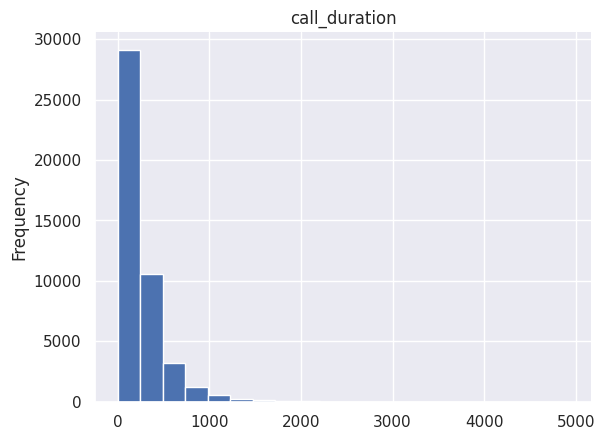

In [ ]:
# a few graphs about the total dispersion of amount of participants in the data

from matplotlib import pyplot as plt
banking['call_duration'].plot(kind='hist', bins=20, title='call_duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

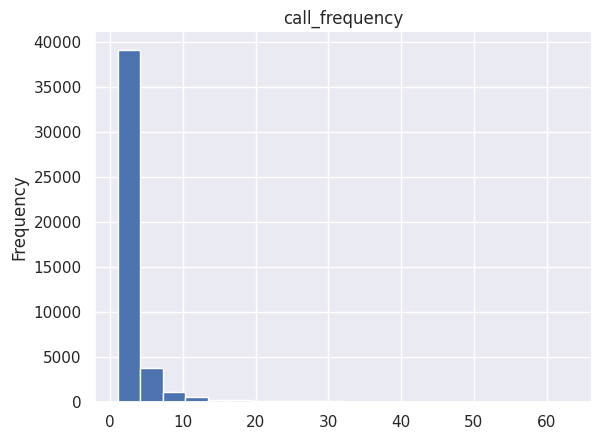

In [ ]:
# a few graphs about the total dispersion of amount of participants in the data

from matplotlib import pyplot as plt
banking['call_frequency'].plot(kind='hist', bins=20, title='call_frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

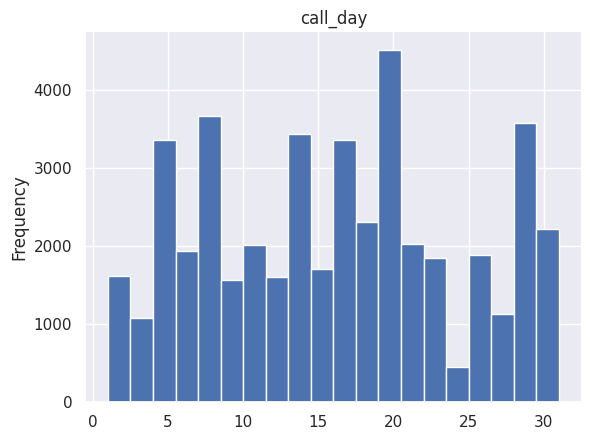

In [ ]:
# a few graphs about the total dispersion of amount of participants in the data

from matplotlib import pyplot as plt
banking['call_day'].plot(kind='hist', bins=20, title='call_day')
plt.gca().spines[['top', 'right',]].set_visible(False)

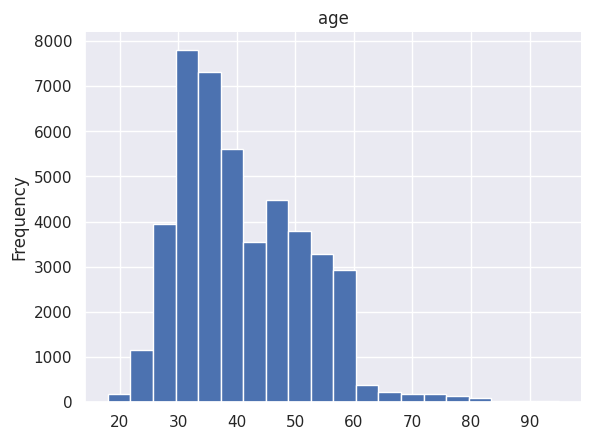

In [ ]:
# a few graphs about the total dispersion of amount of participants in the data

from matplotlib import pyplot as plt
banking['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#checking how many rows, how many columns
banking.shape

(45211, 11)

In [ ]:
#checking what data type each of columns is in
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 45211 non-null  object
 1   age                        45211 non-null  int64 
 2   education_level            45211 non-null  object
 3   marital_status             45211 non-null  object
 4   communication_channel      45211 non-null  object
 5   call_month                 45211 non-null  object
 6   call_day                   45211 non-null  int64 
 7   call_duration              45211 non-null  int64 
 8   call_frequency             45211 non-null  int64 
 9   previous_campaign_outcome  45211 non-null  object
 10  conversion_status          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
#now lets just see a preliminary describe. I will probably do another one after I fix all columns and drop
#lets check for nulls first tho
banking.isnull().sum()
#no nulls is pretty nice. perks of using a beautiful dataset
banking.describe()
#the describe is explaining to me a few preliminary things. The mean times
#people got calls was 2.7 so around 2 or 3. call duration had a mean of 258.2 seconds,
#mean day that people got calls was the 15th - which just shows u that people probably got calls equally on all days
#mean age is 40/41 but I think we have an outlier

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
#now I would like to convert the last column, conversion status to be a boolean, there are only
#two values, converted and not converted
banking['conversion_status'] = banking['conversion_status'].astype(str)
# now am going to convert it to boolean 0 is no and 1 is yes
banking.info()
conversion_status= banking[banking['conversion_status']=='converted']
banking.loc[conversion_status.index,'conversion_status']= 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35505 entries, 0 to 35504
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   occupation                 35505 non-null  object 
 1   age                        35505 non-null  int64  
 2   education_level            35505 non-null  object 
 3   marital_status             35505 non-null  object 
 4   communication_channel      35505 non-null  object 
 5   call_month                 35504 non-null  object 
 6   call_day                   35504 non-null  float64
 7   call_duration              35504 non-null  float64
 8   call_frequency             35504 non-null  float64
 9   previous_campaign_outcome  35504 non-null  object 
 10  conversion_status          35505 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 3.0+ MB


In [ ]:
#I think i am gonna do buckets now for ages and take away the age column
#but first I should really do a few graphs

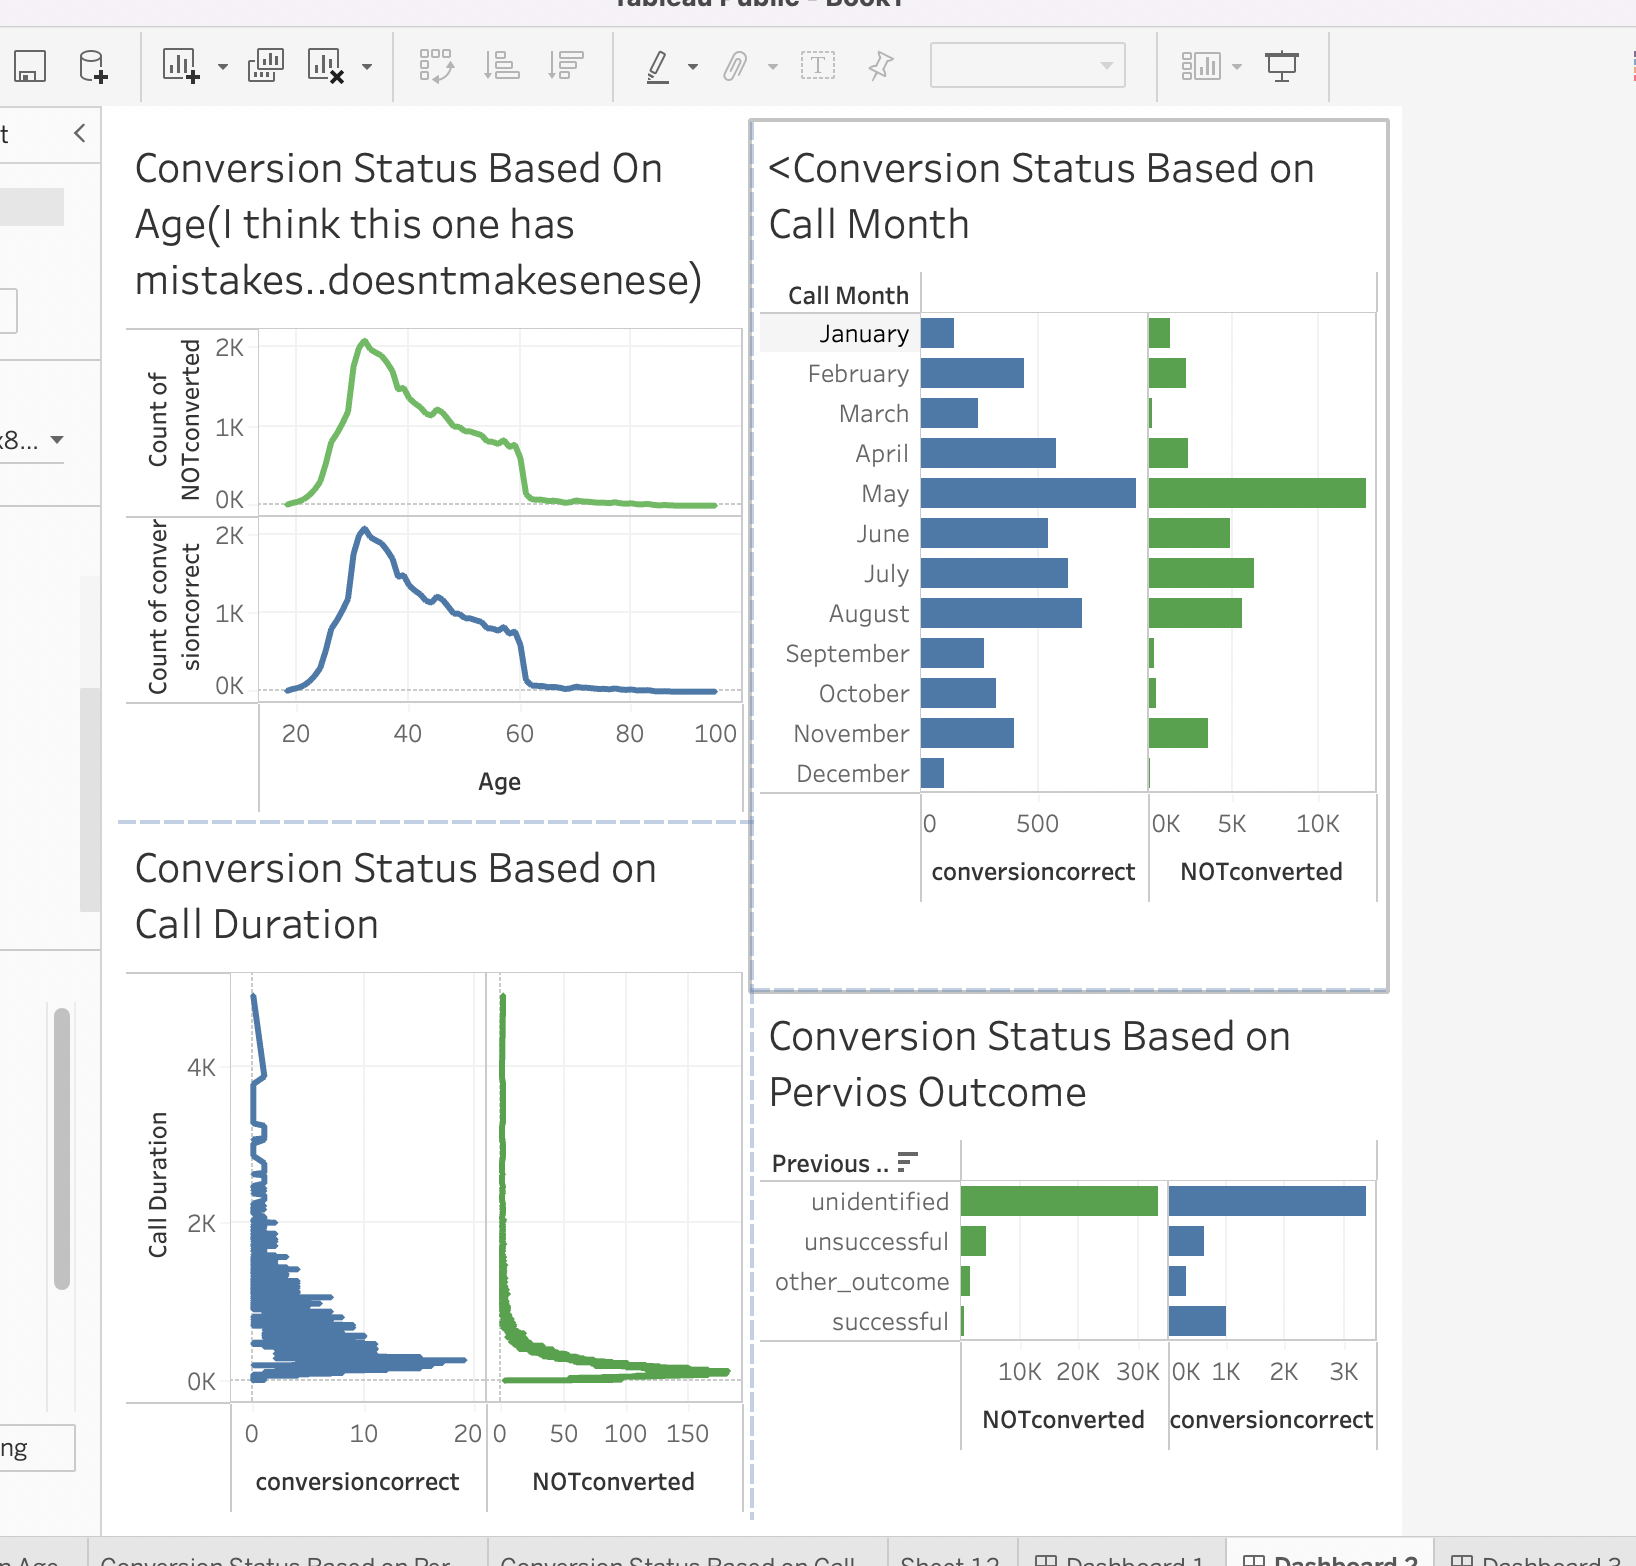

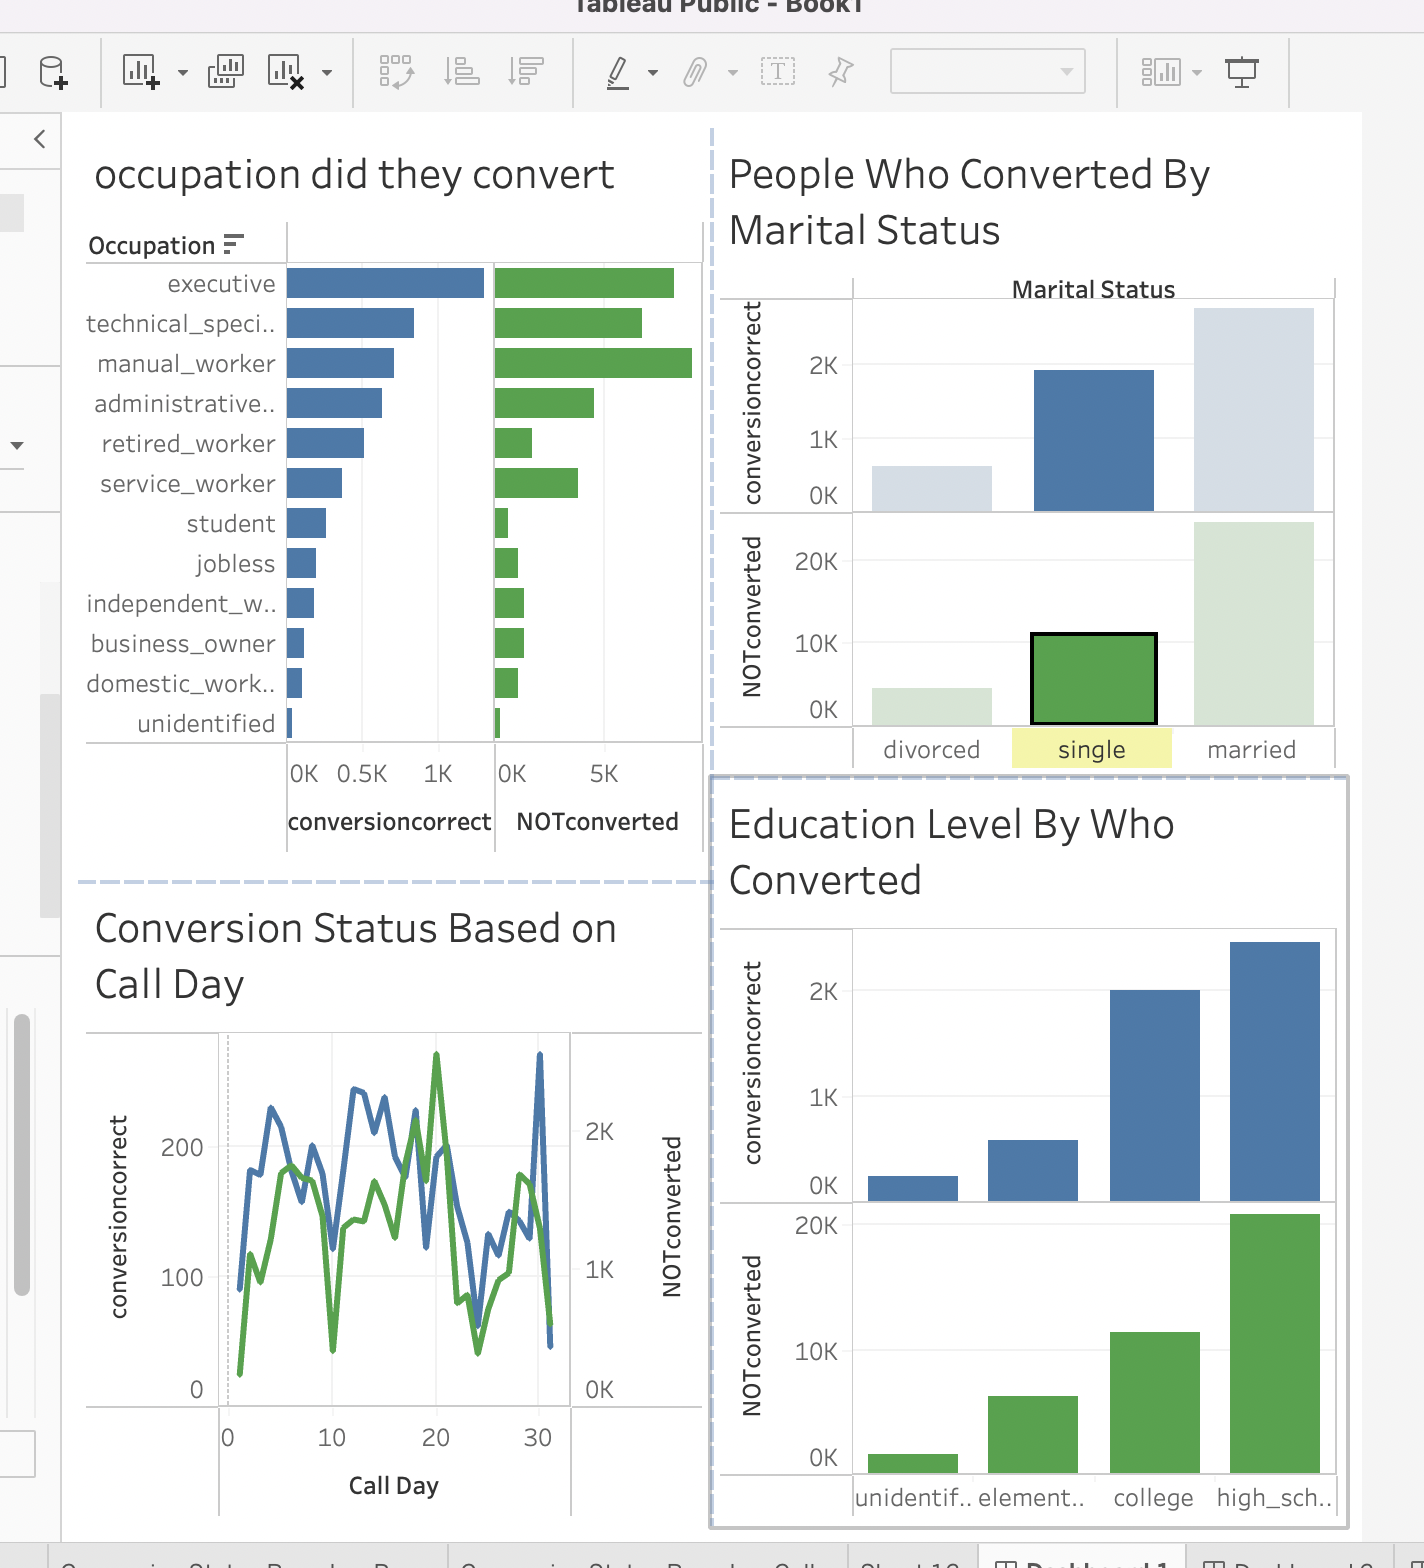

In [ ]:
#here i made a bunch of graphs that left me with more questions which I will answer with descriptive
#the real stats are that converted to not converted ratio is this:
#total that converted is 5,289
#total that did not convert 39,922
#converted by landline: 390  did not convert by landline:2,516
#converted from mobile: 4,369 did not convert by mobile: 24,916
#converted from unidentified: 530 not converted from unidentified:12,490
#marital status divorced converted: 622 divorced did not convert:4585
# married converted:2,755 married did not convert:24,459
#single converted: 1,912 single did not converted:10,878


In [ ]:
#lets make bins for ages instead of having this continuous age category, then I really need to analyze


# First, create a new column 'ages18to28'
banking['ages18to28'] = 0

# Now, update the values in 'age' column and set corresponding 'ages18to28' values to 1
banking.loc[(banking['age'] > 17) & (banking['age'] <= 28), 'ages18to28'] = 1

# Finally, fill NaN values in 'ages18to28' with 0 and convert the column to integer type
banking['ages18to28'] = banking['ages18to28'].fillna(0).astype(int)



In [ ]:

# First, create a new column 'ages29to38'
banking['ages29to38'] = 0

# Now, update the values in 'age' column and set corresponding 'ages29to38' values to 1
banking.loc[(banking['age'] > 28) & (banking['age'] <= 38), 'ages29to38'] = 1

# Finally, fill NaN values in 'ages29to38' with 0 and convert the column to integer type
banking['ages29to38'] = banking['ages29to38'].fillna(0).astype(int)


In [ ]:
# First, create a new column 'ages39to48'
banking['ages39to48'] = 0

# Now, update the values in 'age' column and set corresponding 'ages39to48' values to 1
banking.loc[(banking['age'] > 38) & (banking['age'] <= 48), 'ages39to48'] = 1

# Finally, fill NaN values in 'ages39to48' with 0 and convert the column to integer type
banking['ages39to48'] = banking['ages39to48'].fillna(0).astype(int)


In [ ]:
# First, create a new column 'ages49to58'
banking['ages49to58'] = 0

# Now, update the values in 'age' column and set corresponding 'ages49to58' values to 1
banking.loc[(banking['age'] > 48) & (banking['age'] <= 58), 'ages49to58'] = 1

# Finally, fill NaN values in 'ages49to58' with 0 and convert the column to integer type
banking['ages49to58'] = banking['ages49to58'].fillna(0).astype(int)


In [ ]:
# First, create a new column 'ages59to68'
banking['ages59to68'] = 0

# Now, update the values in 'age' column and set corresponding 'ages59to68' values to 1
banking.loc[(banking['age'] > 58) & (banking['age'] <= 68), 'ages59to68'] = 1

# Finally, fill NaN values in 'ages59to68' with 0 and convert the column to integer type
banking['ages59to68'] = banking['ages59to68'].fillna(0).astype(int)


In [ ]:
# First, create a new column 'ages69to78'
banking['ages69to78'] = 0

# Now, update the values in 'age' column and set corresponding 'ages69to78' values to 1
banking.loc[(banking['age'] > 68) & (banking['age'] <= 78), 'ages69to78'] = 1

# Finally, fill NaN values in 'ages69to78' with 0 and convert the column to integer type
banking['ages69to78'] = banking['ages69to78'].fillna(0).astype(int)


In [ ]:
# First, create a new column 'ages79to88'
banking['ages79to88'] = 0

# Now, update the values in 'age' column and set corresponding 'ages79to88' values to 1
banking.loc[(banking['age'] > 78) & (banking['age'] <= 88), 'ages79to88'] = 1

# Finally, fill NaN values in 'ages79to88' with 0 and convert the column to integer type
banking['ages79to88'] = banking['ages79to88'].fillna(0).astype(int)


In [ ]:
banking['ages89to95'] = 0

# Now, update the values in 'age' column and set corresponding 'ages89to95' values to 1
banking.loc[(banking['age'] > 88) & (banking['age'] <= 95), 'ages89to95'] = 1

# Finally, fill NaN values in 'ages89to95' with 0 and convert the column to integer type
banking['ages89to95'] = banking['ages89to95'].fillna(0).astype(int)


In [ ]:
#now lets look at data, and delete the age column

# Drop the original 'age' column
banking.drop('age', axis=1, inplace=True)


In [ ]:


#lets do some summary stats and correlation matrix, fishers maybe chi square etc

banking.head()

,occupation,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,ages18to28,ages29to38,ages39to48,ages49to58,ages59to68,ages69to78,ages79to88,ages89to95
0,administrative_staff,high_school,married,unidentified,September,9,1,1,successful,not_converted,1,0,0,0,0,0,0,0
1,administrative_staff,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted,0,0,0,1,0,0,0,0
2,jobless,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted,0,0,1,0,0,0,0,0
3,retired_worker,high_school,married,mobile,April,7,72,5,unidentified,not_converted,0,0,0,0,1,0,0,0
4,business_owner,college,married,landline,July,29,184,4,unidentified,not_converted,0,0,1,0,0,0,0,0


In [ ]:
from scipy.stats import pointbiserialr
numerical_columns = ['call_day', 'call_duration', 'call_frequency']


# Calculate the point-biserial correlation coefficient for 'conversion_status' with each numerical variable
for column in numerical_columns:  # Iterate over numerical columns
    correlation, p_value = pointbiserialr(banking[column], banking['conversion_status'])
    print(f"Point-Biserial Correlation between 'conversion_status' and '{column}': {correlation:.3f}, p-value: {p_value:.5f}")
#results are that these are not good indicators of conversion status


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U13')) -> None

In [ ]:
#says there is m by how they called, assuming the person meant mobile and
#there is only one file so I am gonna add it to mobile


# Replace 'm' with 'mobile' in the 'communication_channel' column
banking['communication_channel'] = banking['communication_channel'].replace('m', 'mobile')


In [ ]:
#Frequency Counts: Count the frequency of different categorical variables like 'occupation',
#'education_level', 'marital_status', 'communication_channel', 'call_month', previous_campaign_outcome
#ages18to28	ages29to38	ages39to48	ages49to58	ages59to68	ages69to78	ages79to88	ages89to95
categorical_variables = ['occupation', 'education_level', 'marital_status', 'communication_channel', 'call_month',
                         'previous_campaign_outcome', 'ages18to28', 'ages29to38', 'ages39to48', 'ages49to58',
                         'ages59to68', 'ages69to78', 'ages79to88', 'ages89to95']

# Calculate frequency counts for each categorical variable
for variable in categorical_variables:
    print(f"Frequency counts for '{variable}':")
    print(banking[variable].value_counts())
    print("\n")

Frequency counts for 'occupation':
manual_worker           9732
executive               9458
technical_specialist    7597
administrative_staff    5171
service_worker          4154
retired_worker          2264
independent_worker      1579
business_owner          1487
jobless                 1303
domestic_worker         1240
student                  938
unidentified             288
Name: occupation, dtype: int64


Frequency counts for 'education_level':
high_school          23202
college              13301
elementary_school     6851
unidentified          1857
Name: education_level, dtype: int64


Frequency counts for 'marital_status':
married     27214
single      12790
divorced     5207
Name: marital_status, dtype: int64


Frequency counts for 'communication_channel':
mobile          29285
unidentified    13020
landline         2906
Name: communication_channel, dtype: int64


Frequency counts for 'call_month':
May          13766
July          6895
August        6247
June          5341
N

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

#Chi-Square Test: If you want to test for independence between two categorical variables, you can use the chi-square test. This can help determine whether there
#is a significant association between, for example, 'marital_status' and 'conversion_status'.

# List of categorical variables (excluding 'conversion_status')
categorical_variables = ['occupation', 'education_level', 'marital_status', 'communication_channel',
                         'call_month', 'previous_campaign_outcome']

# Perform chi-square test for each categorical variable
for variable in categorical_variables:
    contingency_table = pd.crosstab(banking[variable], banking['conversion_status'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for '{variable}':")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print("\n")


Chi-square test for 'occupation':
Chi-square statistic: 681.119035004348
P-value: 7.446493811599059e-130


Chi-square test for 'education_level':
Chi-square statistic: 217.2335067478248
P-value: 4.0467221247328467e-44


Chi-square test for 'marital_status':
Chi-square statistic: 139.46196598041806
P-value: 3.679836844090003e-29


Chi-square test for 'communication_channel':
Chi-square statistic: 817.1671579671912
P-value: 1.4680768411234953e-175


Chi-square test for 'call_month':
Chi-square statistic: 2366.4741210176035
P-value: 0.0


Chi-square test for 'previous_campaign_outcome':
Chi-square statistic: 3575.1983814237756
P-value: 0.0




In [ ]:

#Cross-tabulations: Use cross-tabulations (crosstabs) to analyze the relationship between two categorical variables. For example, you could cross-tabulate 'occupation' with 'conversion_status'
#to see if there's any relationship between occupation and conversion. only categorical and binary

# Crosstabulate 'occupation' with 'conversion_status'
occupation_conversion_crosstab = pd.crosstab(banking['occupation'], banking['conversion_status'])

# Display the crosstab
print("Cross-tabulation of 'occupation' with 'conversion_status':")
print(occupation_conversion_crosstab)




Cross-tabulation of 'occupation' with 'conversion_status':
conversion_status        0     1  nan
occupation                           
administrative_staff  3582   491    0
business_owner        1042   101    0
domestic_worker        890    90    0
executive             6349  1033    1
independent_worker    1095   157    0
jobless                869   158    0
manual_worker         7142   550    0
retired_worker        1362   403    0
service_worker        2990   296    0
student                499   209    0
technical_specialist  5319   647    0
unidentified           204    26    0


In [ ]:
# Crosstabulate 'education_level' with 'conversion_status'
education_conversion_crosstab = pd.crosstab(banking['education_level'], banking['conversion_status'])

# Display the crosstab
print("Cross-tabulation of 'education_level' with 'conversion_status':")
print(education_conversion_crosstab)


Cross-tabulation of 'education_level' with 'conversion_status':
conversion_status      0     1  nan
education_level                    
college             8811  1594    1
elementary_school   4932   453    0
high_school        16319  1921    0
unidentified        1281   193    0


In [ ]:
marital_conversion_crosstab = pd.crosstab(banking['marital_status'], banking['conversion_status'])

# Display the crosstab
print("Cross-tabulation of 'marital_status' with 'conversion_status':")
print(marital_conversion_crosstab)

Cross-tabulation of 'marital_status' with 'conversion_status':
conversion_status      0     1  nan
marital_status                     
divorced            3567   479    0
married            19227  2194    1
single              8549  1488    0


In [ ]:
channel_conversion_crosstab = pd.crosstab(banking['communication_channel'], banking['conversion_status'])

# Display the crosstab
print("Cross-tabulation of 'communication_channel' with 'conversion_status':")
print(channel_conversion_crosstab)


Cross-tabulation of 'communication_channel' with 'conversion_status':
conversion_status          0     1  nan
communication_channel                  
landline                2012   304    0
mobile                 19575  3445    1
unidentified            9756   412    0


In [ ]:
# Crosstabulate 'call_month' with 'conversion_status'
month_conversion_crosstab = pd.crosstab(banking['call_month'], banking['conversion_status'])

# Display the crosstab
print("Cross-tabulation of 'call_month' with 'conversion_status':")
print(month_conversion_crosstab)


Cross-tabulation of 'call_month' with 'conversion_status':
conversion_status      0    1
call_month                   
April               1852  445
August              4376  542
December              84   78
February            1721  346
January              983  105
July                4937  517
June                3731  435
March                185  194
May                10090  715
November            2806  319
October              326  257
September            252  208


In [ ]:
# Crosstabulate 'previous_campaign_outcome' with 'conversion_status'
outcome_conversion_crosstab = pd.crosstab(banking['previous_campaign_outcome'], banking['conversion_status'])

# Display the crosstab
print("Cross-tabulation of 'previous_campaign_outcome' with 'conversion_status':")
print(outcome_conversion_crosstab)


Cross-tabulation of 'previous_campaign_outcome' with 'conversion_status':
conversion_status              0     1
previous_campaign_outcome             
other_outcome               1219   251
successful                   415   783
unidentified               26350  2627
unsuccessful                3359   500


In [ ]:
#this is optimizing code, takes a long time to look at and understand the graphs this
#is much easier to look at and understand

age_groups = ['ages18to28', 'ages29to38', 'ages39to48', 'ages49to58',
              'ages59to68', 'ages69to78', 'ages79to88', 'ages89to95']

# Create cross-tabulation tables for each age group with 'conversion_status'
for age_group in age_groups:
    age_group_conversion_crosstab = pd.crosstab(banking[age_group], banking['conversion_status'])
    print(f"Cross-tabulation of '{age_group}' with 'conversion_status':")
    print(age_group_conversion_crosstab)
    print('\n')


Cross-tabulation of 'ages18to28' with 'conversion_status':
conversion_status      0     1  nan
ages18to28                         
0                  28757  3573    1
1                   2586   588    0


Cross-tabulation of 'ages29to38' with 'conversion_status':
conversion_status      0     1  nan
ages29to38                         
0                  18871  2637    1
1                  12472  1524    0


Cross-tabulation of 'ages39to48' with 'conversion_status':
conversion_status      0     1  nan
ages39to48                         
0                  22699  3269    0
1                   8644   892    1


Cross-tabulation of 'ages49to58' with 'conversion_status':
conversion_status      0     1  nan
ages49to58                         
0                  25178  3540    1
1                   6165   621    0


Cross-tabulation of 'ages59to68' with 'conversion_status':
conversion_status      0     1  nan
ages59to68                         
0                  30143  3822    1
1            

In [ ]:
banking.dropna(inplace=True)
y_train = y_train.astype(int)


In [ ]:
#logistic regression-based on binary column could determine whether theyll churn or not
#dependant is binary with multiple predictors

#Logistic Regression: If you're interested in predicting the 'conversion_status'
#based on other variables, you could use logistic regression. This would allow you to
#understand the relationship between predictors (e.g., 'call_duration', 'call_frequency', etc.)
# and the probability of conversion.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'banking' is your DataFrame

# Define independent variables (features)
X = banking[['occupation', 'education_level', 'marital_status', 'communication_channel',
             'call_month', 'call_day', 'call_duration', 'call_frequency', 'previous_campaign_outcome',
             'ages18to28', 'ages29to38', 'ages39to48', 'ages49to58', 'ages59to68',
             'ages69to78', 'ages79to88', 'ages89to95']]

# Define target variable
y = banking['conversion_status']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)



Accuracy: 0.8886431493973239


In [ ]:

print(y_train.unique())
print(y_train.dtype)

[0 1]
object
